In [ ]:
%cd drive/MyDrive/multimedia/hw4

[Errno 2] No such file or directory: 'drive/MyDrive/multimedia/hw4'
/content/drive/MyDrive/multimedia/hw4


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# <div dir="rtl">سوال۱:</div>

<div dir="rtl">
در تابع زیر یک تصویر با پس زمینه روشن دریافت میکنیم که نوشته ای با رنگ تیره در بردارد. همچنین علاوه بر تصویر باید انحراف معیار فیلتر گوسی و اینکه تصویر اصلی و سایه آن در چه فاصله ای نسبت به هم قرار بگیرند مشخص شود. به عنوان مثال اگر آرگومان اصلی برابر با ۲۰ بود یعنی سایه ۲۰ پیکسل پایین تر و سمت راست تصویر اصلی قرار بگیرد.

در این تابع ابتدا با استفاده از فیلتر گوسی یک تصویر بلور شده از تصویر اصلی میسازیم و سپس تصویر اصلی را در جهت چپ و بالا به اندازه ای که در آرگومان سوم گفته شده شیفت میدهیم و با جمع تو تصویر یاد شده تصویر نهائی را می سازیم.
<div>

In [ ]:
def H4_Shadow(I, s, d):
  img_gau = gaussian_filter(I, sigma=d)
  moved = np.zeros((I.shape[0], I.shape[1]))
  for i in range(I.shape[0]):
    for j in range(I.shape[1]):
      if i < I.shape[0] - s and j < I.shape[1] - s:
        moved[i, j] = img[i + s, j + s]
      else:
        moved[i, j] = 1
  out = (moved+img_gau)/2
  plt.imshow(out, cmap='gray')
  return out

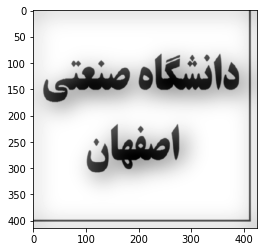

In [ ]:
img = plt.imread("iut.png")
img = img[:,:,0]
out1 = H4_Shadow(img, 10, 20) 

# <div dir="rtl">سوال۱:</div>

<div dir="rtl">
در این سوال میخواستیم یک تصویر هایبرید بسازیم که در در فاصله دور و نزدیک دو تصویر متفاوت را نمایش دهد. برای این کار به کمک فیلتر گوسی تصویر اول را به یک تصویر فرکانس پایین تبدیل میکنیم که تنها از دور قابل تشخیص است و فرکانس پایین تصویر دوم را با استفاده از فیلتر گوسی یافته و از تصویر اصلی کم میکنیم تا تنها نواحی با فرکانس بالا باقی بمانند این تصویر فقط از فاصله نزدیک قابل مشاهده است. سپس دو تصویر را با یکدیگر جمع میکنیم تا تصویر نهایی ساخته شود.

<div>

In [ ]:
def H4_hybrid(I, J, m, n):
  I_gau = gaussian_filter(I, sigma=m)
  J_gau = gaussian_filter(J, sigma=n)
  J_high = J - J_gau
  plt.imshow((I_gau + J_high)/2, cmap="gray")
  return (I_gau + J_high)/2 

In [ ]:
img3 = plt.imread("3.png")
R, G, B = img3[:,:,0], img3[:,:,1], img3[:,:,2]
imgGray3 = 0.2989 * R + 0.5870 * G + 0.1140 * B

In [ ]:
img4 = plt.imread("4.png")
R, G, B = img4[:,:,0], img4[:,:,1], img4[:,:,2]
imgGray4 = 0.2989 * R + 0.5870 * G + 0.1140 * B

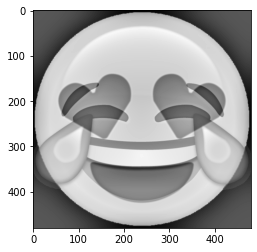

In [ ]:
out = H4_hybrid(imgGray3, imgGray4, 1, 30)